In [1]:
#!pip install xgboost
#!pip install pyspark
#!pip install plotly
#!pip install folium
from xgboost import XGBClassifier
import sys
import folium
import json
import requests
import os
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td
from dateutil.relativedelta import relativedelta as rt
import pyspark
import pandas as pd
from plotly import graph_objects as go
import numpy as np
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import utils
import time
from sklearn.metrics import classification_report
import joblib

Using TensorFlow backend.


In [2]:
datatrain_muestra_500=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_500.csv', header=0)
datatrain_muestra_300=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_300.csv', header=0)
datatrain_muestra_200=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_200.csv', header=0)
datatrain_muestra_100=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_100.csv', header=0)

dataval_muestra_200=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_200.csv', header=0)
dataval_muestra_100=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_100.csv', header=0)
dataval_muestra_60=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_60.csv', header=0)
dataval_muestra_30=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_30.csv', header=0)

datatest_muestra_210=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_210.csv', header=0)
datatest_muestra_120=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_120.csv', header=0)
datatest_muestra_90=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_90.csv', header=0)
datatest_muestra_32=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_32.csv', header=0)

In [3]:
datatrain_muestra_500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 54 columns):
Unnamed: 0                  500000 non-null int64
trans_date_trans_time       500000 non-null object
cc_num                      500000 non-null int64
merchant                    500000 non-null int64
category                    500000 non-null int64
amt                         500000 non-null int64
first                       500000 non-null object
last                        500000 non-null object
gender                      500000 non-null int64
street                      500000 non-null object
city                        500000 non-null object
state                       500000 non-null object
zip                         500000 non-null int64
lat                         500000 non-null float64
long                        500000 non-null float64
city_pop                    500000 non-null int64
job                         500000 non-null int64
dob                         5

In [4]:
datatrain_muestra_100

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,week_Thursday,week_Tuesday,week_Wednesday,distancia_cli_com,Contador,trans_fecha,transacciones_60d,transacciones_24h,transacciones_fraude_24h,monto_prom_trans_60d
0,792959,2019-12-02 13:26:25,3523843138706408,527,13,9,Grace,Williams,1,28812 Charles Mill Apt. 628,...,0,0,0,76.414286,1,2019-12-02,235.0,9.0,0.0,45.320166
1,699747,2019-10-26 05:21:17,4412720572684931,36,8,3,Richard,Marshall,0,295 Page Creek Suite 181,...,0,0,0,127.984432,1,2019-10-26,73.0,2.0,0.0,58.348243
2,122618,2019-03-09 23:03:48,3521417320836166,630,11,3,Angela,Hodges,1,08236 Kim Hill,...,0,0,0,96.180926,1,2019-03-09,260.0,6.0,0.0,93.554046
3,558603,2019-08-26 03:47:44,3531129874770000,22,12,779,Shelby,Mitchell,1,974 Cindy Stream,...,0,0,0,90.850715,1,2019-08-26,307.0,7.0,4.0,90.809805
4,1165852,2020-05-01 18:12:52,371284100299909,521,9,176,Hannah,Thomas,1,1004 Willis Pass,...,0,0,0,53.538366,1,2020-05-01,104.0,5.0,0.0,75.987358
5,978696,2020-02-01 19:17:50,4587657402165341815,210,0,149,Amber,Lewis,1,6296 John Keys Suite 858,...,0,0,0,43.613064,1,2020-02-01,420.0,2.0,0.0,69.559742
6,1036022,2020-03-05 12:45:10,4390966588600992777,124,5,50,Kyle,Simmons,0,8149 Harris Divide,...,1,0,0,95.464739,1,2020-03-05,92.0,1.0,0.0,78.511458
7,971857,2020-01-27 23:34:02,3543299015720986,95,6,240,Angela,White,1,137 Adam Dale,...,0,0,0,92.324138,1,2020-01-27,156.0,7.0,7.0,85.614359
8,451446,2019-07-19 21:50:59,3590736522064285,450,0,131,Kimberly,Gonzalez,1,72966 Shannon Pass Apt. 391,...,0,0,0,64.876628,1,2019-07-19,374.0,11.0,0.0,80.825467
9,725683,2019-11-05 22:49:54,2610529083834453,667,7,59,Tanya,Dickerson,1,053 Kim Valley Suite 928,...,0,1,0,103.635610,1,2019-11-05,74.0,1.0,0.0,148.187568


In [5]:
X_cols = ['merchant','amt','zip','job','Hora','Edad', 'category_food_dining','category_gas_transport',
          'category_grocery_net','category_grocery_pos','category_health_fitness','category_home',
          'category_kids_pets','category_misc_net','category_misc_pos','category_personal_care',
          'category_shopping_net','category_shopping_pos','category_travel','gender_M','week_Monday',
          'week_Saturday','week_Sunday','week_Thursday','week_Tuesday','week_Wednesday', 'distancia_cli_com', 
          'transacciones_60d','transacciones_24h','monto_prom_trans_60d']

Y_cols = ['is_fraud']

In [6]:
X_train_500 = datatrain_muestra_500[X_cols]
y_train_500 = datatrain_muestra_500[Y_cols]
X_val_200 = dataval_muestra_200[X_cols]
y_val_200 = dataval_muestra_200[Y_cols]
X_test_210 = datatest_muestra_210[X_cols]
y_test_210 = datatest_muestra_210[Y_cols]

In [7]:
X_train_300 = datatrain_muestra_300[X_cols]
y_train_300 = datatrain_muestra_300[Y_cols]
X_val_100 = dataval_muestra_100[X_cols]
y_val_100 = dataval_muestra_100[Y_cols]
X_test_120 = datatest_muestra_120[X_cols]
y_test_120 = datatest_muestra_120[Y_cols]

In [8]:
X_train_200 = datatrain_muestra_200[X_cols]
y_train_200 = datatrain_muestra_200[Y_cols]
X_val_60 = dataval_muestra_60[X_cols]
y_val_60 = dataval_muestra_60[Y_cols]
X_test_90 = datatest_muestra_90[X_cols]
y_test_90 = datatest_muestra_90[Y_cols]

In [9]:
X_train_100 = datatrain_muestra_100[X_cols]
y_train_100 = datatrain_muestra_100[Y_cols]
X_val_30 = dataval_muestra_30[X_cols]
y_val_30 = dataval_muestra_30[Y_cols]
X_test_32 = datatest_muestra_32[X_cols]
y_test_32 = datatest_muestra_32[Y_cols]

In [10]:
RFC = RandomForestClassifier()


# Número de árboles a realizar.
n_estimators = [200, 300, 500]

# número máximo de características consideradas para dividir un nodo
max_features = ['auto', 'sqrt']

# Número máximo de niveles en cada árbol de decisión
max_depth = [None,10, 20, 50]

# Número mínimo de muestras necesarias para dividir un nodo
min_samples_split = [5, 20, 50]

# Número mínimo de muestras necesarias en cada nodo hoja
min_samples_leaf = [1, 2, 4, 20]

# Método para muestrear puntos de datos (con o sin reemplazo)
bootstrap = [True, False]

# Creando el grid
RFC_grid = {'n_estimators': n_estimators,'max_features': max_features, 'max_depth': max_depth, 
            'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

RFC_grid

{'n_estimators': [200, 300, 500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 10, 20, 50],
 'min_samples_split': [5, 20, 50],
 'min_samples_leaf': [1, 2, 4, 20],
 'bootstrap': [True, False]}

In [11]:
#RFC_GRID_BUSQUEDA = GridSearchCV(estimator=RFC, param_grid=RFC_grid, cv = 3, verbose=1, n_jobs = -1)

In [12]:
#RFC_GRID_BUSQUEDA_500=RFC_GRID_BUSQUEDA.fit(X_train_500, y_train_500)
#RFC_GRID_BUSQUEDA_300=RFC_GRID_BUSQUEDA.fit(X_train_300, y_train_300)
#RFC_GRID_BUSQUEDA_200=RFC_GRID_BUSQUEDA.fit(X_train_200, y_train_200)
#RFC_GRID_BUSQUEDA_100=RFC_GRID_BUSQUEDA.fit(X_train_100, y_train_100)

In [13]:
#print(RFC_GRID_BUSQUEDA_500.best_params_)
#print(RFC_GRID_BUSQUEDA_300.best_params_)
#print(RFC_GRID_BUSQUEDA_200.best_params_)
#print(RFC_GRID_BUSQUEDA_100.best_params_)

In [14]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())

'2021-11-22 07:39:17'

In [15]:
RF_500 = RandomForestClassifier(bootstrap=False, min_samples_split=5, max_depth=50,max_features='sqrt', 
                                min_samples_leaf=1, n_estimators=500, class_weight= 'balanced')
RF_500.fit(X_train_500, y_train_500)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=50,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=500)

In [16]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())

'2021-11-22 07:55:26'

In [17]:
#predicción con datos de validación
RFC_PRED_VAL = RF_500.predict(X_val_200)

In [18]:
print(classification_report(y_val_200, RFC_PRED_VAL))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198825
           1       0.96      0.82      0.88      1175

    accuracy                           1.00    200000
   macro avg       0.98      0.91      0.94    200000
weighted avg       1.00      1.00      1.00    200000



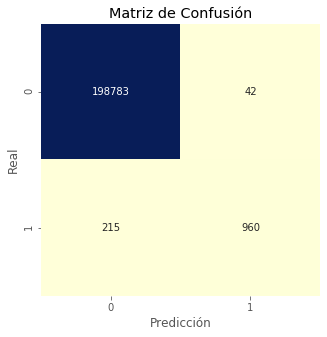

In [19]:
utils.plot_cm(y_val_200, RFC_PRED_VAL)
#la precisión en validación es 1 y el recall se puede decir que también es 1.

PREDICCIÓN PARA DATOS DE TEST

In [20]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())

'2021-11-22 07:55:48'

In [21]:
RFC_PRED = RF_500.predict(X_test_210)

In [22]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())

'2021-11-22 07:56:08'

In [23]:
print(classification_report(y_test_210, RFC_PRED))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209189
           1       0.90      0.76      0.83       811

    accuracy                           1.00    210000
   macro avg       0.95      0.88      0.91    210000
weighted avg       1.00      1.00      1.00    210000



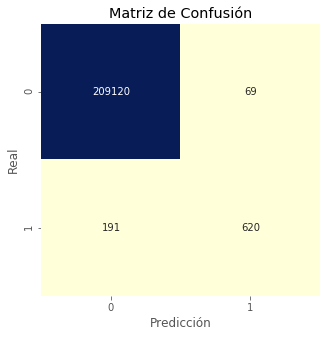

In [24]:
utils.plot_cm(y_test_210, RFC_PRED)

In [25]:
joblib.dump(RF_500, 'RF_2.joblib') # Guardo el modelo.

['RF_2.joblib']

In [26]:
#ALTA MODELO Y TESTS
RF_ALTA = joblib.load('RF_2.joblib')

RF_predictions_120 = RF_ALTA.predict(X_test_120)
RF_predictions_90 = RF_ALTA.predict(X_test_90)
RF_predictions_32 = RF_ALTA.predict(X_test_32)

In [27]:
print(classification_report(y_test_120, RF_predictions_120))
print(classification_report(y_test_90, RF_predictions_90))
print(classification_report(y_test_32, RF_predictions_32))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119545
           1       0.91      0.77      0.83       455

    accuracy                           1.00    120000
   macro avg       0.95      0.88      0.92    120000
weighted avg       1.00      1.00      1.00    120000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89650
           1       0.91      0.79      0.84       350

    accuracy                           1.00     90000
   macro avg       0.95      0.90      0.92     90000
weighted avg       1.00      1.00      1.00     90000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31887
           1       0.89      0.78      0.83       113

    accuracy                           1.00     32000
   macro avg       0.94      0.89      0.91     32000
weighted avg       1.00      1.00      1.00     32000



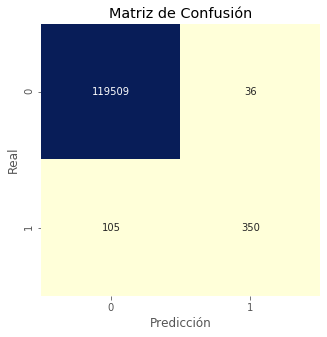

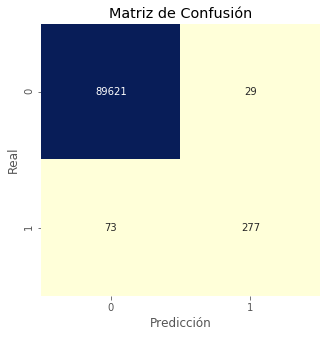

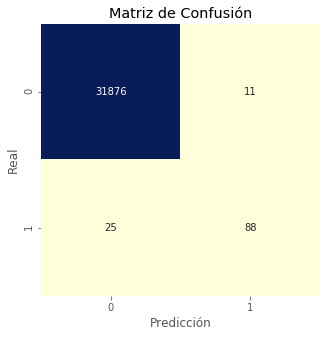

In [28]:
utils.plot_cm(y_test_120, RF_predictions_120)
utils.plot_cm(y_test_90, RF_predictions_90)
utils.plot_cm(y_test_32, RF_predictions_32)

IMPORTANCIA DE LAS VARIABLES

In [29]:
'''#por pureza de NODOS
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train_500.columns,
                             'importancia': RF_ALTA.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)'''

'#por pureza de NODOS\nimportancia_predictores = pd.DataFrame(\n                            {\'predictor\': X_train_500.columns,\n                             \'importancia\': RF_ALTA.feature_importances_}\n                            )\nprint("Importancia de los predictores en el modelo")\nprint("-------------------------------------------")\nimportancia_predictores.sort_values(\'importancia\', ascending=False)'

In [30]:
'''from sklearn.inspection import permutation_importance
import multiprocessing
#por permutación
importancia = permutation_importance(
                estimator    = RF_ALTA,
                X            = X_train_500,
                y            = y_train_500,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train_500.columns
df_importancia.sort_values('importances_mean', ascending=False)'''

"from sklearn.inspection import permutation_importance\nimport multiprocessing\n#por permutación\nimportancia = permutation_importance(\n                estimator    = RF_ALTA,\n                X            = X_train_500,\n                y            = y_train_500,\n                n_repeats    = 5,\n                scoring      = 'neg_root_mean_squared_error',\n                n_jobs       = multiprocessing.cpu_count() - 1,\n                random_state = 123\n             )\n\n# Se almacenan los resultados (media y desviación) en un dataframe\ndf_importancia = pd.DataFrame(\n                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}\n                 )\ndf_importancia['feature'] = X_train_500.columns\ndf_importancia.sort_values('importances_mean', ascending=False)"